In [2]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
import corner.corner as corner

In [3]:
df1_data = {'App Mag': [13.233, 14.053, 14.976], 
            'Errors': [0.1, 0.1, 0.1], 
            'Filter': ['H', "I", 'r']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,13.233,0.1,H
1,14.053,0.1,I
2,14.976,0.1,r


In [4]:
s = System(df1, 100, 0.01)
#s.init_age_prior
s.sys_priors

[UniformPrior(minval=0.2, maxval=1.3),
 UniformPrior(minval=0.0, maxval=15640000000.0),
 GaussianPrior(mu=100, sigma=0.01, no_negatives=True)]

In [4]:
mdf = maketable('WD', filters=["H", "J"])

In [5]:
findMags(mdf, 1.13487333e+00, 9.10543304e+09, 1.00003039e+02, filters=['H', 'J'])

Interpolation error: 1.13487333 M$\odot$, 9105433040.0 yrs
Interpolation error: 1.13487333 M$\odot$, 9105433040.0 yrs


array([9.75838722, 9.85291743])

In [5]:
sampler = MCMCSampler(s, num_threads=5, num_temps=3, num_walkers=200, table_type='WD', filters=["H", "I", "r"])

[[-inf -inf]
 [-inf -inf]]


In [15]:
sampler = MCMCSampler(s, num_threads=5, num_temps=1, num_walkers=200, table_type='WD', filters=["H", "I", "r"])

In [7]:
sampler.curr_pos

array([[[1.20710976e+00, 2.55176534e+09, 9.99775900e+01],
        [9.74045237e-01, 5.04364838e+09, 1.00079504e+02],
        [3.51791496e-01, 2.82903482e+09, 9.99359314e+01],
        [1.19438908e+00, 3.12628589e+09, 9.99606159e+01],
        [7.79000946e-01, 2.24997341e+09, 9.99440186e+01],
        [5.05377211e-01, 3.97210476e+08, 9.99939203e+01],
        [3.43228329e-01, 2.37361301e+08, 9.99589699e+01],
        [1.18476105e+00, 2.30094152e+09, 9.99736481e+01],
        [3.34436844e-01, 3.14042105e+09, 1.00074594e+02],
        [1.29777131e+00, 5.49413076e+09, 1.00048246e+02],
        [7.64260126e-01, 5.55645521e+09, 9.99107426e+01],
        [1.07111000e+00, 3.38879914e+07, 1.00043623e+02],
        [2.98567466e-01, 1.24235674e+09, 9.99948853e+01],
        [8.40154335e-01, 4.08225886e+09, 1.00077604e+02],
        [4.75864173e-01, 2.50181734e+09, 9.99394807e+01],
        [9.96621190e-01, 2.70992609e+09, 1.00078440e+02],
        [2.26618999e-01, 2.56138832e+09, 1.00030931e+02],
        [2.023

In [16]:
import ptemcee
import src.priors as priors
psampler = ptemcee.Sampler(150, 3, sampler._logl, priors.all_lnpriors,
                          ntemps=2, threads=5, logpargs=[sampler.priors, ])

In [17]:
p = np.array(sampler.curr_pos).copy()
logl, logp = psampler._evaluate(p)

In [18]:
logl

array([[-6.69473082e+01, -1.07485687e+01, -2.11371280e+01,
        -4.31749513e+01, -1.23689376e+02, -9.30864366e+02,
        -1.33914938e+03, -9.94817528e+01, -7.40494611e+00,
        -2.62436365e+03, -1.32440623e+00, -1.30866201e+03,
        -2.56387212e+02, -2.72555980e+01, -3.94221953e+01,
        -1.08627120e+02, -1.03761577e+01, -3.19958030e+02,
        -4.61921559e+02, -1.67541497e+02, -5.24002233e+01,
        -2.97822094e+02, -3.45054470e+01, -2.30468551e+02,
        -3.13293879e+02, -2.83467289e+02, -1.98735743e+03,
        -3.11325485e+02, -1.10746093e+02, -1.77822821e+02,
        -1.67300515e+02, -9.31998034e+00, -5.05694640e+01,
        -3.75571288e+02, -5.44537881e+02, -5.10094235e+02,
        -8.10968092e+01, -8.07930512e+00, -2.67580639e+02,
        -2.01198252e+02, -1.58138621e+02, -4.01675794e+01,
        -1.07277599e+02, -3.00555724e-01, -9.67259353e+00,
        -5.56024699e+01, -1.76405156e+01,  2.12216063e+00,
        -2.04012543e+02, -4.45034566e+01, -2.69741128e+0

In [19]:
logp

array([[-21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.95896984, -21.95896984,
        -21.95896984, -21.95896984, -21.

In [9]:
s.sys_priors[0].compute_lnprob(1.21274317e+00)

-0.0953101798043249

In [8]:
s.sys_priors[1].compute_lnprob(5.48379666e+09)

-23.473097572063576

In [12]:
s.sys_priors[2].compute_lnprob(1.00168534e+02)

-inf

In [6]:
sampler.run_sampler(1000, 100, 2, "test2.hdf5")

Starting Burn in
100/100 steps of burn-in complete
Burn in complete. Sampling posterior now.
1000/1000 steps completed
Run complete


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

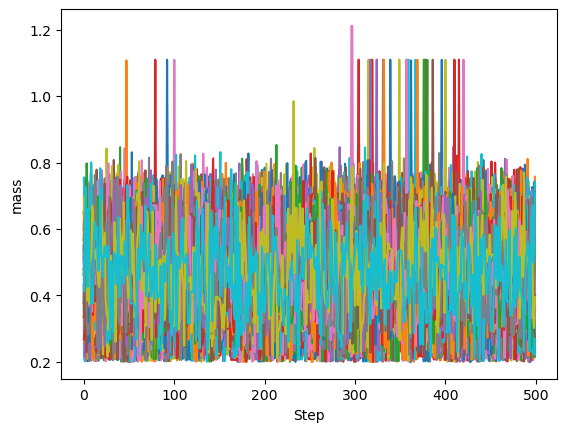

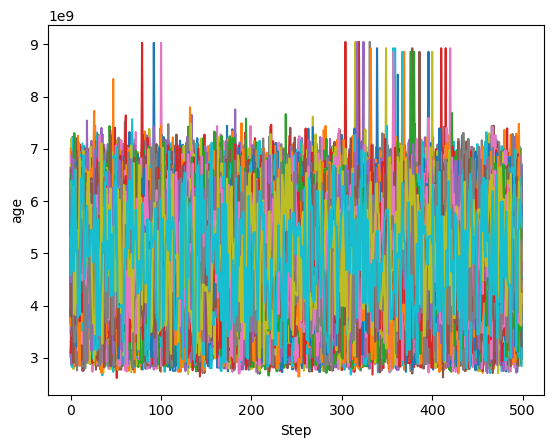

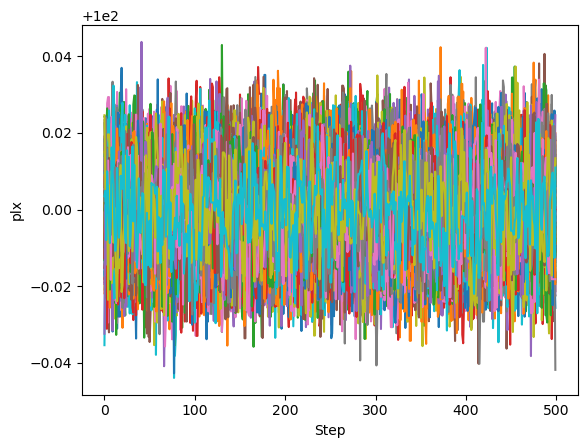

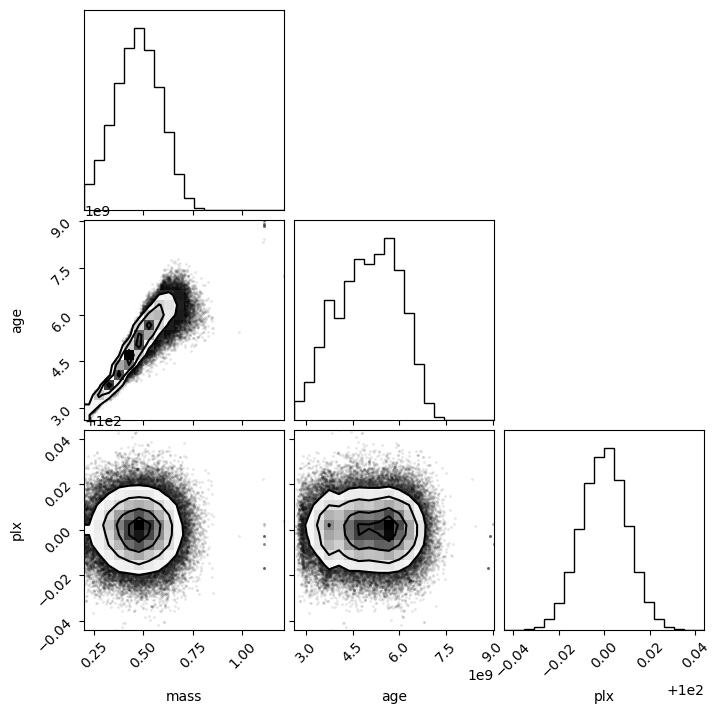

In [7]:
sampler.examine_chains()

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

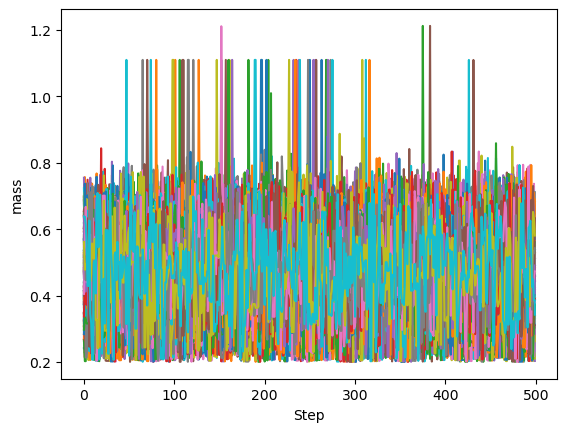

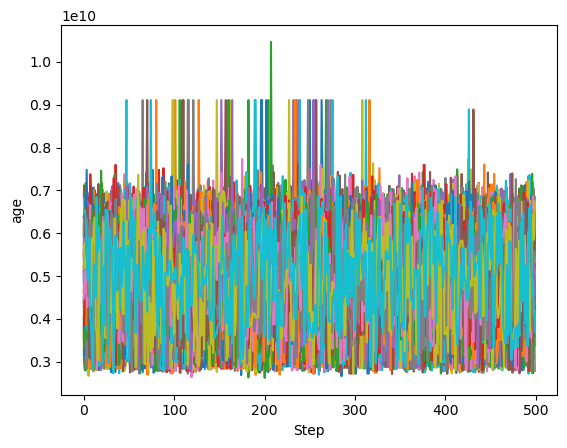

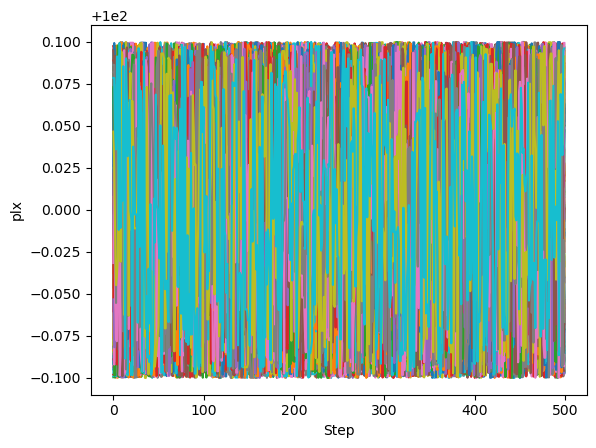

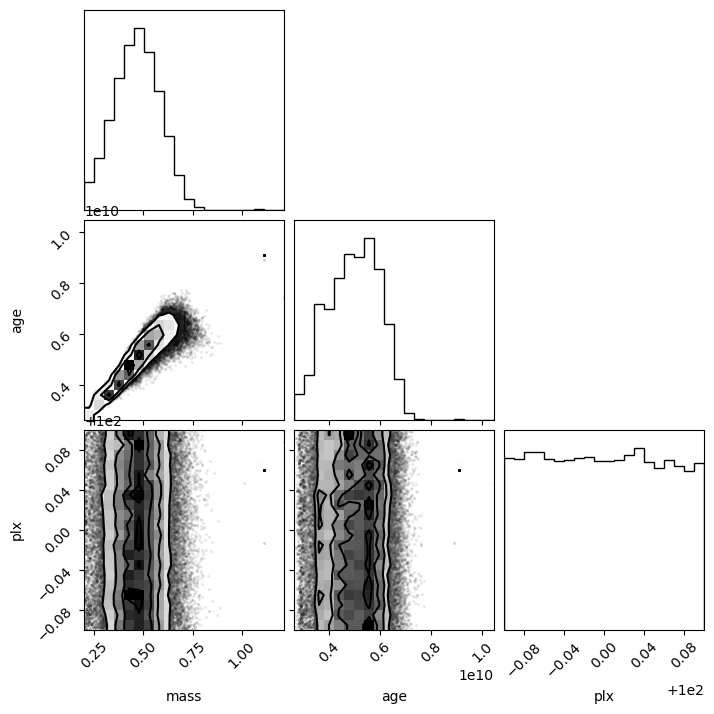

In [22]:
sampler.examine_chains()

In [ ]:
test_params = np.array([2.17289824e-01, 1.36642406e+10, 9.99720353e+01])
df1["App Mag"]

#findMags(df1, test_params[0], test_params[1], test_params[2], filts)

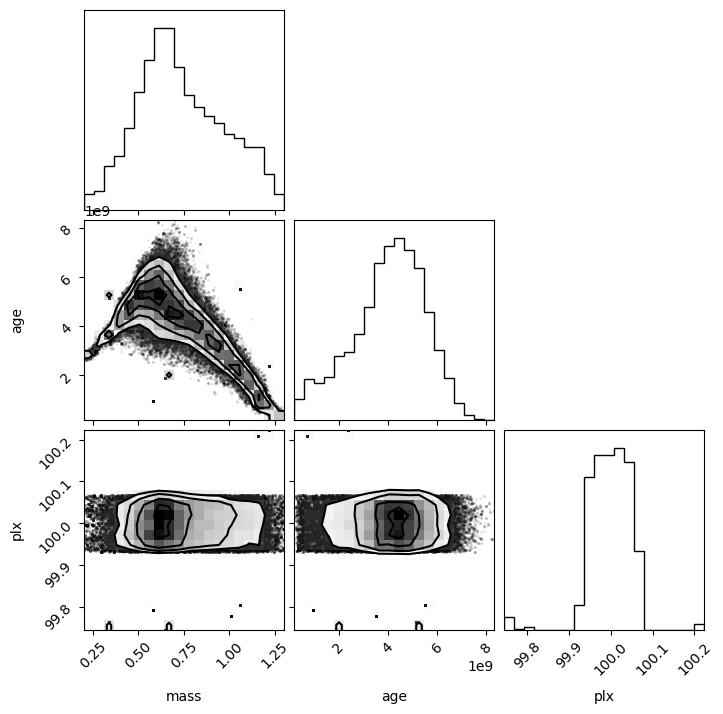

In [18]:
flatchain = np.copy(sampler.results.post)
flatchain.shape
figure = corner(flatchain,
                labels=['mass', 'age', 'plx'])